# Will you be mAI Doc?
**Automated Chest X-Ray Anomaly Detection**

LT 11: Ma. Cristina Bargo, Gio Kristofer Fontanilla, Camille Rivero, Roy Ritche Vy

**Abstract**

Insert abstract here

In [1]:
import numpy as np
import pandas as pd
import random
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

Reading chest x-ray images may be a simple tasks for radiologists, but it involves careful observation and knowledge of anatomical principles, physiology and pathology. These factors make it difficult to develop an automated system to read chest x-rays, taking into account all possible thoracic diseases.

## Data

The data set consists of anonymized chest x-ray images released by the NIH Clinical Center. It is a compilation of scans from more than 30,000 patients, including many with advanced lung disease. To protect the privacy of the patients involved in this study, the dataset was rigorously screened to remove all personally identifiable information before the release of the data to the public.

In [2]:
df = pd.read_csv("./Data - Other Files/Data_Entry_2017.csv")
df.apply(pd.to_numeric, errors='ignore')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
df = df.astype({'Image Index':'str', 'Finding Labels':'str',
                'Patient ID':'category', 'Patient Gender':'category',
                'View Position':'category'})
df.drop('Unnamed: 11', axis=1, inplace=True)
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [4]:
df['With Findings'] = (df['Finding Labels']
                       .apply(lambda x: 0 if x=='No Finding' else 1))
df['With Findings'] = df['With Findings'].astype('category')

Proportion (Female): 0.4350695683196575
Proportion (Male): 0.5649304316803425


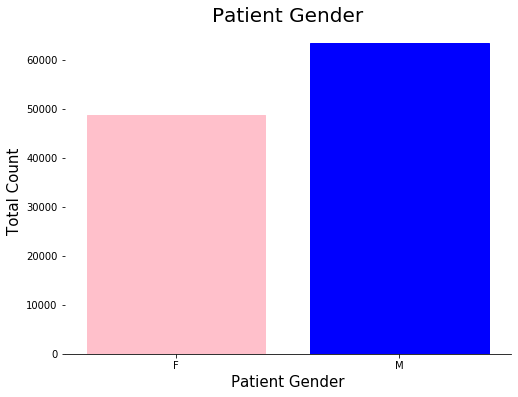

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot('Patient Gender', data=df, ax=ax)
ax.set_title('Patient Gender', fontsize=20)
ax.set_xlabel('Patient Gender', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.get_children()[0].set_color('pink')
ax.get_children()[1].set_color('blue')

x, m1 = df[df['Patient Gender']=='F'].shape
s, m2 = df.shape
print('Proportion (Female): ' + str(x/s))
print('Proportion (Male): ' + str(1 - x/s))

Proportion (AP): 0.39966107741705315
Proportion (PA): 0.6003389225829469


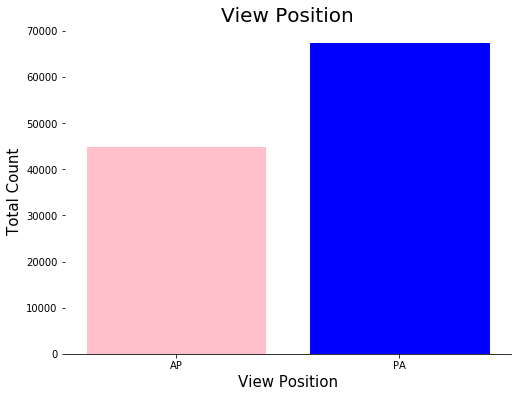

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot('View Position', data=df, ax=ax)
ax.set_title('View Position', fontsize=20)
ax.set_xlabel('View Position', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.get_children()[0].set_color('pink')
ax.get_children()[1].set_color('blue')

x, m1 = df[df['View Position']=='AP'].shape
s, m2 = df.shape
print('Proportion (AP): ' + str(x/s))
print('Proportion (PA): ' + str(1 - x/s))

Proportion (0): 0.5383606849803781
Proportion (1): 0.46163931501962185


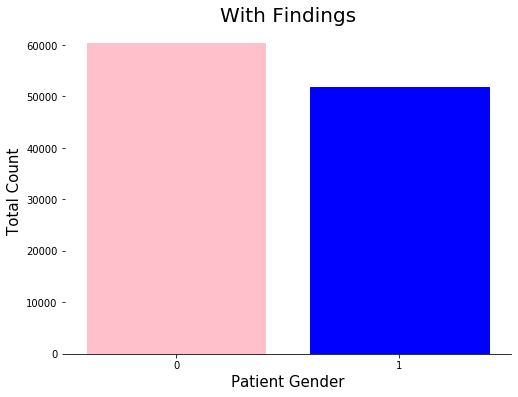

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot('With Findings', data=df, ax=ax)
ax.set_title('With Findings', fontsize=20)
ax.set_xlabel('Patient Gender', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.get_children()[0].set_color('pink')
ax.get_children()[1].set_color('blue')

x, m1 = df[df['With Findings']==0].shape
s, m2 = df.shape
print('Proportion (0): ' + str(x/s))
print('Proportion (1): ' + str(1 - x/s))

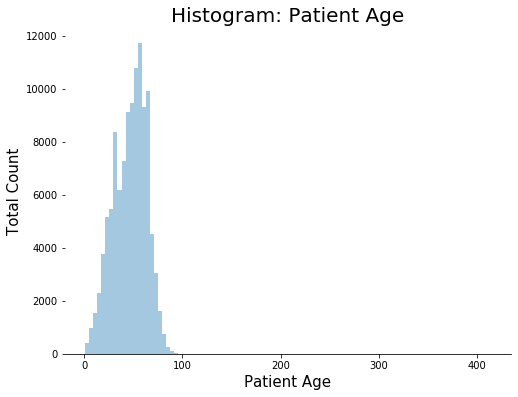

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['Patient Age'], bins=100, kde=False, ax=ax)
ax.set_title('Histogram: Patient Age', fontsize=20)
ax.set_xlabel('Patient Age', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')

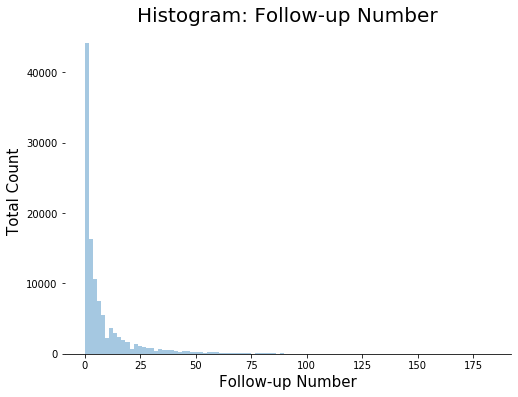

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['Follow-up #'], bins=100, kde=False, ax=ax)
ax.set_title('Histogram: Follow-up Number', fontsize=20)
ax.set_xlabel('Follow-up Number', fontsize=15)
ax.set_ylabel('Total Count', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')

## Methodology

## Results

## Conclusions

## References

* NIH Clinical Center provides one of the largest publicly available chest x-ray datasets to scientific community | National Institutes of Health (NIH). (2017, September 27). Retrieved from https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community